<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-최근접 이웃의 한계**

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


회귀 모델을 훈련시켜서 50cm인 농어의 무게를 예측했다.

모델은 1,033g정도로 예측했다.

하지만 실제 이 농어의 무게는 훨씬 더 많이 나간다.

무엇이 문제인지 살펴보자.

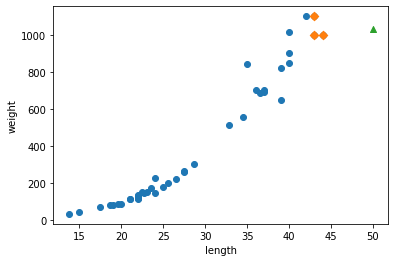

In [5]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 커질수록 농어의 무게가 증가하는 것이 당연하다.

하지만 최근접 이웃은 가장 가까이에 있는 이웃을 참고하여 예측값을 만들어낸다.

50cm 농어의 이웃은 45cm 근방이기 때문에 이 샘플들의 무게를 평균한다.

따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.

In [6]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [7]:
print(knr.predict([[100]]))

[1033.33333333]


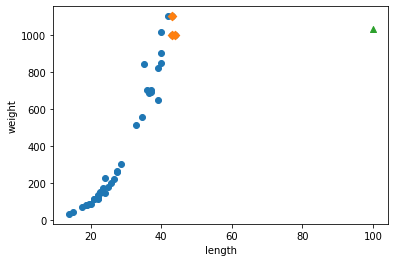

In [8]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

마찬가지로 100cm 농어도 1033g이라고 예측한다.

100cm 농어의 이웃도 50cm 농어와 마찬가지로 참고하는 이웃이 같기때문이다.

---

이렇게 k-최근접 이웃 알고리즘은 훈련 세트에 있는 샘플 범위 밖의 값을 예측하는게 굉장히 어렵다.

그렇기 때문에 k-최근접 이웃 알고리즘은 훈련 세트 범위 안에서 이웃한 샘플을 예측해야한다.

# **선형 회귀(Linear Regression)**

위의 문제처럼 길이가 늘어날 수록 무게가 올라가는 추세를 따라가는 알고리즘이 바로 선형회귀이다.

선형회귀는 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다.

1차원 데이터, 즉, 특성이 하나일 경우 직선의 방정식으로 나타낸다.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

사이킷런은 sklearn.linear_model패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓았다.

---

사용법은 k-최근접 이웃 알고리즘과 동일하게 클래스를 우선 임포트한다.

그리고 이 클래스(선형회귀)의 객체를 만들어서 준비한 데이터로 fit()메소드를 사용해서 훈련한다.

---

사이킷런의 모델 클래스들은 훈련, 평가, 예측하는 메소드 이름이 모두 동일하다.

In [12]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


50cm 농어에 대한 예측값이 1241g으로 나왔다.

어떻게 이런 값이 나왔는지 확인해보자.

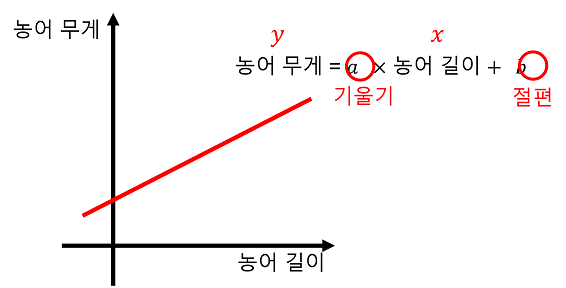

선형회귀는 직선을 학습한다.

직선의 방정식은 y = ax + b으로 나타낼 수 있다.

여기에서 x를 농어의 길이, y를 농어의 무게로 두면 직선의 방정식이 만들어진다.

선형회귀는 기울기(a)와 절편(b), 이 두 값을 찾는 것이다.

In [13]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


LinearRegression 클래스가 찾은 이 데이터에 가장 잘 맞는 기울기(a)와 절편(b)은 모델 객체의 coef_와 intercept_ 속성에 저장되어 있다.

사이킷런 모델들은 어떤 데이터에서 학습한 값들을 모델 객체에 저장할 때 다른 속성과 구분될 수 있도록 속성 이름 끝에 언더바(_)를 추가했다.

---

기울기는 39, y의 절편은 -709가 나왔다.

기울기는 넘파이배열로 y절편은 하나이기 때문에 스칼라값으로 나온다.

기울기가 넘파이배열로 나오는 이유는 여러 개의 특성을 사용할 수도 있어서 각 특성마다 기울기가 저장되어있기 때문이다.

우리는 특성을 하나만 사용했기때문에 길이 특성에 대한 기울기로 원소 한 개만 들어있다.

---

※ 여기서 잠깐 ※
머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 부른다.

그리고 coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터(model parameter)라고 부른다.

이 책에서 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다.

이를 모델 기반 학습이라고 부른다.

앞서 사용한 k-최근접 이웃에는 모델 파라미터가 없다.

훈련 세트를 저장하는 것이 훈련의 전부였기 때문이다.

이를 사례 기반 학습이라고 부른다.

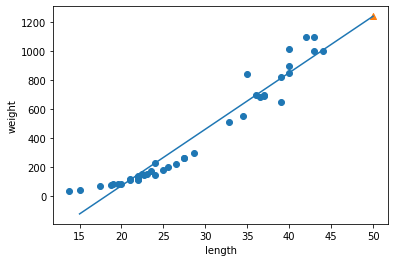

In [14]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이 15에서 50까지 직선을 그려보았다.

이 직선을 그리려면 앞에서 구한 기울기와 절편을 사용하여 (15, 15*lr.coef_+lr.intercept_)와 (50, 50*lr.coef_+lr.intercept) 두 점을 이으면 된다.

---

이제 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있다.

In [15]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


훈련 세트와 테스트 세트에 대한 R^2 점수를 확인했다.

테스트 세트가 훈련 세트보다 점수가 낮은 것으로 보아 과대적합이 되었다고 볼 수 있지만 이전에 k-최근접이웃보다 점수가 낮기때문에 오히려 전체적으로 과소적합되었다고 볼 수 있다.

이렇게 어떤 모델이 과대적합이나 과소적합되었는지는 여러 가지 모델이나 실험을 통해서 상대적으로 평가하는 것이 좋다.

---

그래프의 왼쪽 아래를 보면 무게가 음수로 떨어진 것으로 보여진다.

선형회귀의 단점 중에 하나가 농어의 새끼(?), 아주 작은 농어를 넣고 예측을 하면 무게가 0보다 작아지는 직선이 그려질 수 있다.

왜냐하면 y절편이 큰 음수로 나왔기 때문이다.

---

사실 산점도를 자세히 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가깝다.

직선보다는 2차 방정식으로 만들면 R^2점수가 높아질 것으로 보이고, 음수로 떨어지는 문제도 방지할 수 있을 것이라고 예측된다.

최적의 직선을 찾기보다 최적의 곡선을 찾으면 된다.

# **다항 회귀**

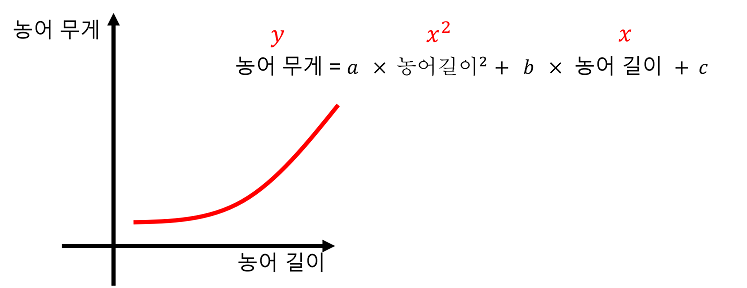

위의 다항식, 즉, 2차 방정식의 a와 b, 그리고 c의 계수를 구한다면 최적의 곡선을 찾을 수 있을 것이다.

이렇게 다항식을 사용하여 특성과 타깃 사이의 관계를 나타내는 선형 회귀를 다항 회귀(polynomial regression)이라고 부른다.

In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

사이킷런은 길이를 제곱한 항을 훈련 세트에 추가해서 선형 회귀 모델에 전달하면 다항 회귀를 자동으로 구현한다.

---

이전에 사용했던 column_stack()함수를 사용하면 train_input을 제곱한 것과 train_input 두 배열을 나란히 붙일 수 있다.

이렇게 편리하게 제곱된 배열을 얻을 수 있다.

In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


이제 데이터를 준비했으니 똑같이 선형 회귀 모델 객체를 만들어서 fit()메소드에 전달하여 학습하면 된다.

훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다. 

목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.

---

50cm 농어에 대해 예측을 할 때 앞서 훈련 세트에 제곱 항을 만들어서 추가해주었기때문에 마찬가지로 50cm 농어도 제곱 항을 넣어줘야한다.

---

앞에서 훈련한 모델보다 50cm 농어에 대한 예측값이 높다.

In [18]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


제곱항을 넣었기때문에 계수가 2개가 나오는 것을 확인할 수 있다.

이 선형 모델은 '무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05' 이러한 2차함수 그래프를 훈련했다.

---

※ 여기서 잠깐 ※
위의 식은 2차 방정식인데 비선형이 아닌가?

어떻게 이를 선형회귀라고 부를까?

사실 길이^2을 간단히 다른 변수로 치환할 수 있다.

가령 길이^2 = 왕길이로 바꾸면 무게 = 1.01*왕길이 - 2.16*길이 + 116.05와 같이 쓸 수 있다.

즉 무게는 왕길이와 길이의 선형 관계로 표현할 수 있다.

이렇게 다항회귀는 비선형일 수 있지만 선형회귀로 표현할 수 있다.

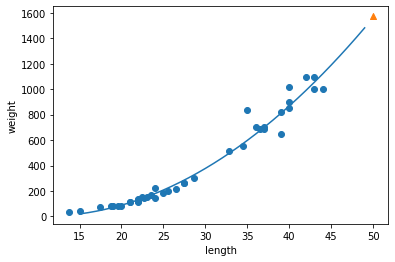

In [19]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

짧은 직선을 이어서 그리면 마치 곡선처럼 표현할 수 있다.

---

1씩 증가하는 15에서 49까지의 포인트 배열을 만든다.

그리고 x축에 포인트배열을 전달하고, y축에 위의 다항식에 포인트배열을 전달하면 된다.

---

단순 선형 회귀 모델보다 훨씬 나은 그래프가 그려졌고, 훈련 세트의 경향을 잘 따르고 있다.

그리고 무게가 음수로 나오는 문제도 해결되었다.

In [20]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


단순 선형 회귀 모델보다 성능이 훨씬 좋아졌다.

하지만 테스트 세트의 점수가 더 높은 것으로 보아 과소적합 경향이 아직 남아있다.

조금 더 복잡한 모델을 만들어 훈련 세트에 좀 더 과대적합하여 모델을 학습시킬 필요가 있다.